**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Load Dataset**

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Deskripsi Dataset**

In [ ]:
print("Jumlah Baris dan Kolom:", df.shape)

print("\nTipe Data:")
print(df.dtypes)

print("\nStatistik Deskriptif:")
print(df.describe(include='all'))

print("\nCek Missing Values:")
print(df.isnull().sum())

print("\nNama kolom:")
print(df.columns)


Jumlah Baris dan Kolom: (5110, 12)

Tipe Data:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Statistik Deskriptif:
                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.0

**Preprocessing**

a. Menangani Missing Value

In [ ]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['smoking_status'] = df['smoking_status'].fillna('unknown')

b. Encode Kolom Kategorikal

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])

c. Memisahkan Fitur dan Target

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']


d. Normalisasi Data Numerik

In [ ]:
scaler = StandardScaler()
X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X[['age', 'avg_glucose_level', 'bmi']])


**Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Training Decision Tree**

In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

**Evaluasi Model**

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9334637964774951

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.20      0.03      0.06        62

    accuracy                           0.93      1022
   macro avg       0.57      0.51      0.51      1022
weighted avg       0.90      0.93      0.91      1022


Confusion Matrix:
 [[952   8]
 [ 60   2]]


**Visualisasi**

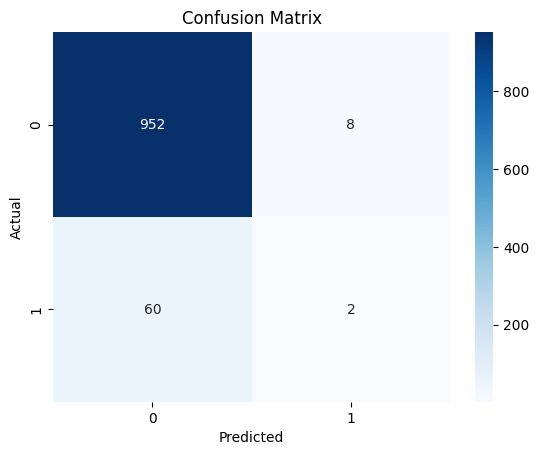

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


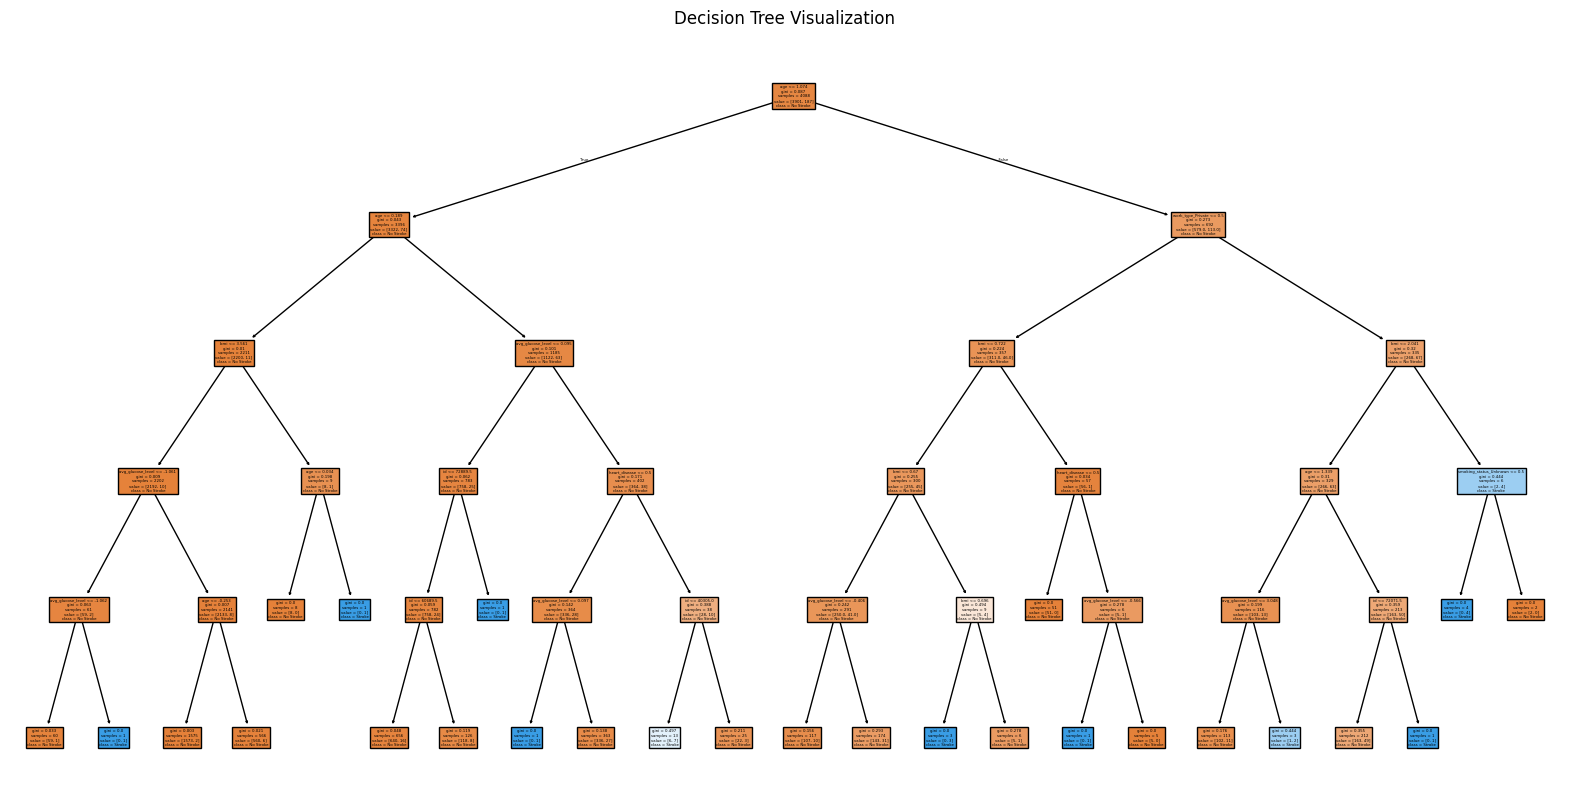

In [25]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True)
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()
